In [1]:
from common import teams, colors, Fonts
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import pandas as pd

In [2]:
df = pd.read_csv("possibilities.csv", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12
LA,0,0,0,0,0,5184,10368,31104,0,0,0,0
POR,32832,12096,1728,0,0,0,0,0,0,0,0,0
WAS,0,0,0,0,0,0,0,0,3456,13824,29376,0
HOU,0,0,2592,7776,23328,11664,1296,0,0,0,0,0
ORL,0,0,0,0,0,0,0,0,32832,12096,1728,0
CHI,0,0,0,0,2592,9072,19440,15552,0,0,0,0
RGN,10368,19008,13824,3456,0,0,0,0,0,0,0,0
KC,3456,8640,17280,13824,3456,0,0,0,0,0,0,0
SD,0,6912,11232,21600,6912,0,0,0,0,0,0,0
LOU,0,0,0,0,0,0,0,0,10368,20736,15552,0


In [3]:
table = pd.read_csv("table.csv", index_col=0)
table

,team,points,goals_for,goals_against,wins,ties,losses,goals_diff,tie_points,tie_goals
1,POR,38,46,21,10,8,3,25,0,0
2,RGN,37,29,19,10,7,4,10,0,0
3,KC,36,29,28,10,6,5,1,0,0
4,SD,35,32,21,10,5,6,11,0,0
5,HOU,33,33,26,9,6,6,7,0,0
6,NC,31,46,33,9,4,8,13,0,0
7,CHI,30,32,28,8,6,7,4,0,0
8,LA,29,23,25,8,5,8,-2,0,0
9,ORL,22,22,42,5,7,9,-20,0,0
10,LOU,20,22,35,4,8,9,-13,0,0


In [4]:
# Sort based on rank
df["rank"] = list(map(lambda x: table.index[table["team"] == x][0], df.index))
df = df.sort_values("rank", ascending=False)
df = df.drop("rank", axis=1)
df

,1,2,3,4,5,6,7,8,9,10,11,12
NJNY,0,0,0,0,0,0,0,0,0,0,0,46656
WAS,0,0,0,0,0,0,0,0,3456,13824,29376,0
LOU,0,0,0,0,0,0,0,0,10368,20736,15552,0
ORL,0,0,0,0,0,0,0,0,32832,12096,1728,0
LA,0,0,0,0,0,5184,10368,31104,0,0,0,0
CHI,0,0,0,0,2592,9072,19440,15552,0,0,0,0
NC,0,0,0,0,10368,20736,15552,0,0,0,0,0
HOU,0,0,2592,7776,23328,11664,1296,0,0,0,0,0
SD,0,6912,11232,21600,6912,0,0,0,0,0,0,0
KC,3456,8640,17280,13824,3456,0,0,0,0,0,0,0


Error in callback <function _draw_all_if_interactive at 0x7ff0e8ba74c0> (for post_execute):


MemoryError: In RendererAgg: Out of memory

<Figure size 28800x16200 with 0 Axes>

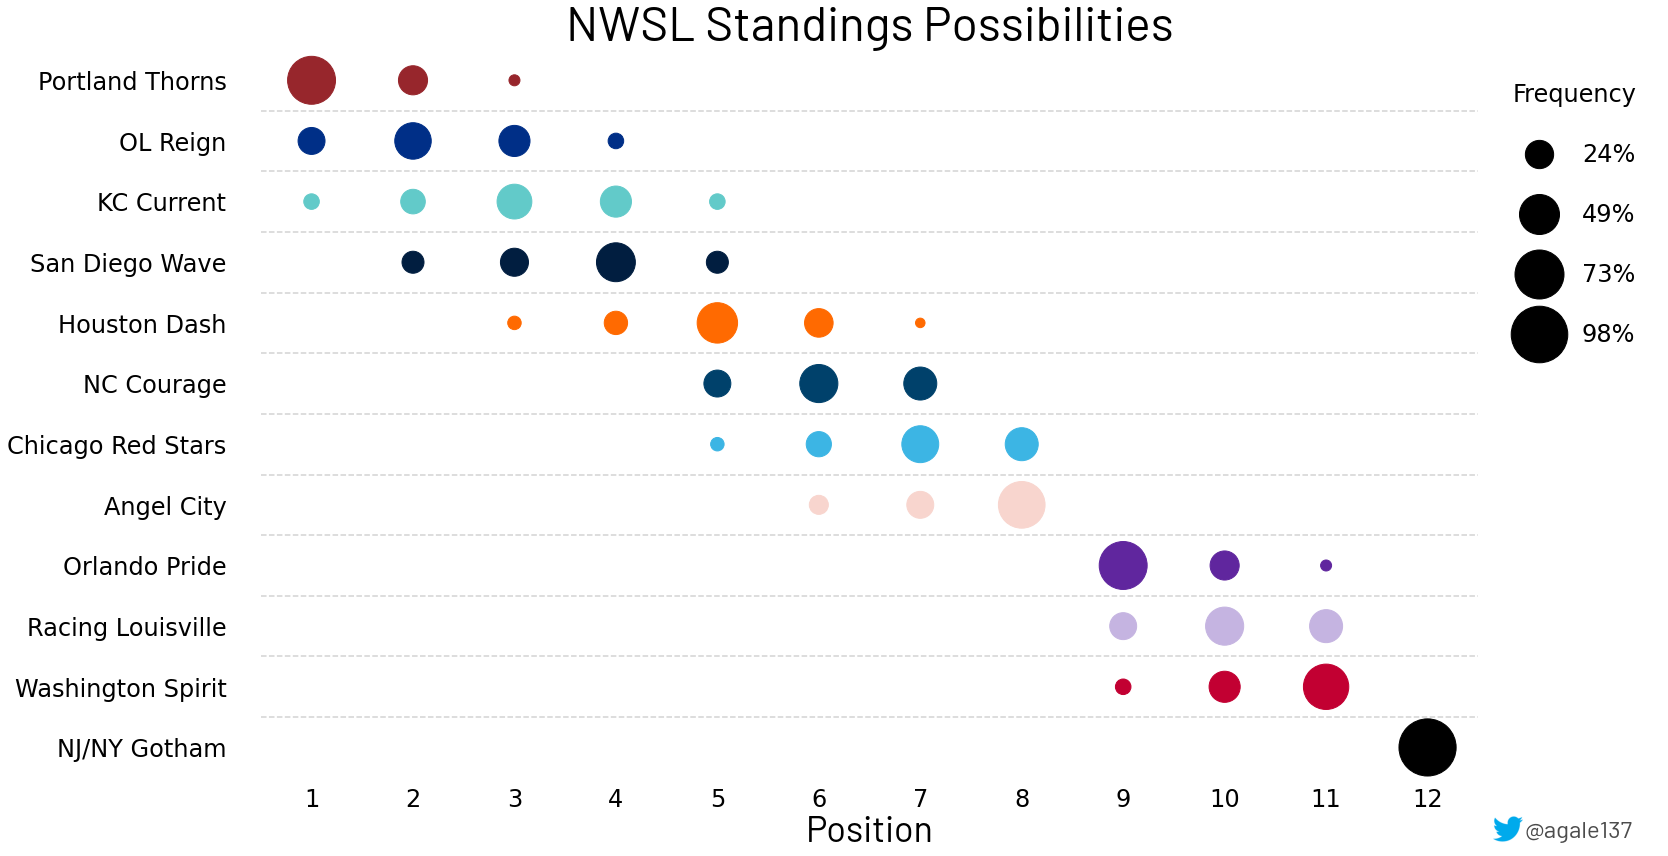

In [6]:
# Setup
plt.rcParams["figure.figsize"] = (24, 13.5)
plt.figure(dpi=1200, facecolor="white")
fig, ax = plt.subplots()
fig.patch.set_facecolor("white")

# Scale
scale = 0.07

# Plot data
for i, row in df.iterrows():
    sc = ax.scatter(df.columns, [i] * len(df.index), s=row * scale, c=colors[i])

    # Legend
    num = 5
    high = int("".join(filter(str.isdigit, sc.legend_elements("sizes", num)[1][-1])))
    if high > 2000:
        plt.legend(
            *sc.legend_elements("sizes", num),
            loc="upper right",
            prop={"size": 24},
            bbox_to_anchor=(1.1, 1),
            labelspacing=1.5,
            title="Frequency",
            title_fontsize=24,
            borderpad=1,
            frameon=False
        )

# Format legend text
leg = ax.get_legend()
for lbl in leg.get_texts():
    val = int("".join(filter(str.isdigit, lbl.get_text()))) / scale / sum(df.iloc[0])
    lbl.set_text("{:.0%}".format(val))

# Horizontal spacers
for i in range(0, len(df.index) - 1):
    plt.hlines(y=i + 0.5, xmin=-0.5, xmax=11.5, linestyle="--", color="lightgray")

# Title
plt.title("NWSL Standings Possibilities", fontproperties=Fonts.BARLOW, size=48)

# Axes
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(bottom=False, left=False)
ax.tick_params(axis="both", which="major", labelsize=24)
ax.tick_params(axis="y", which="major", pad=-30)
plt.yticks(df.index, [teams[i] for i in df.index])
plt.xlabel("Position", fontproperties=Fonts.BARLOW, size=36)

# Twitter logo and username
plt.text(
    1.07,
    -0.07,
    "@agale137",
    transform=ax.transAxes,
    color="black",
    fontsize=24,
    alpha=0.7,
    fontproperties=Fonts.BARLOW,
    va="center",
    ha="right",
)
im = plt.imread("/home/agale/nwsl-analytics/src/common/twitter.png")
newax = fig.add_axes([0.86, 0.06, 0.03, 0.03], anchor="SE", zorder=1)
newax.imshow(im)
newax.axis("off")

# Save image
plt.savefig("possibilities.png", bbox_inches="tight", transparent=False)